In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import torch
import torchvision

import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
from mpl_toolkits.mplot3d import Axes3D

# Generate dataset

In [3]:
y = np.random.randint(0,10,5000)
idx= []
for i in range(10):
    print(i,sum(y==i))
    idx.append(y==i)

0 535
1 468
2 505
3 492
4 516
5 516
6 511
7 515
8 448
9 494


In [4]:
x = np.zeros((5000,2))

In [5]:
x[idx[0],:] = np.random.multivariate_normal(mean = [2,5],cov=[[5,0],[0,5]],size=sum(idx[0]))

x[idx[1],:] = np.random.multivariate_normal(mean = [-15,-7],cov=[[5,0],[0,5]],size=sum(idx[1]))

x[idx[2],:] = np.random.multivariate_normal(mean = [2,-2],cov=[[5,0],[0,5]],size=sum(idx[2]))

x[idx[3],:] = np.random.multivariate_normal(mean = [-2,0],cov=[[3,0],[0,3]],size=sum(idx[3]))


x[idx[4],:] = np.random.multivariate_normal(mean = [15,8],cov=[[3,0],[0,3]],size=sum(idx[4]))

x[idx[5],:] = np.random.multivariate_normal(mean = [-15,6],cov=[[3,0],[0,3]],size=sum(idx[5]))

x[idx[6],:] = np.random.multivariate_normal(mean = [2,-18],cov=[[3,0],[0,3]],size=sum(idx[6]))

x[idx[7],:] = np.random.multivariate_normal(mean = [10,-10],cov=[[3,0],[0,3]],size=sum(idx[7]))

x[idx[8],:] = np.random.multivariate_normal(mean = [-10,-15],cov=[[3,0],[0,3]],size=sum(idx[8]))

x[idx[9],:] = np.random.multivariate_normal(mean = [-2,10],cov=[[3,0],[0,3]],size=sum(idx[9]))

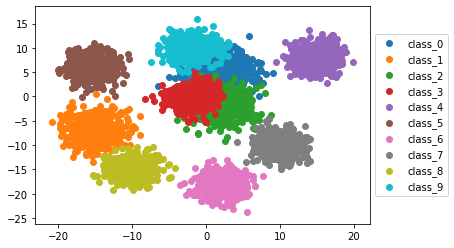

In [6]:
for i in range(10):
    plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [7]:
z = np.zeros((5000,1))
x = np.concatenate((x, z) , axis =1)
x

array([[ -4.2679148 ,   1.78990151,   0.        ],
       [  2.37928798,   3.4555695 ,   0.        ],
       [  1.91935496,  -1.41010505,   0.        ],
       ...,
       [ -9.19636433, -15.6345754 ,   0.        ],
       [ 10.61999678, -11.86597516,   0.        ],
       [ 17.66831111,   4.40369428,   0.        ]])

In [8]:
x.shape

(5000, 3)

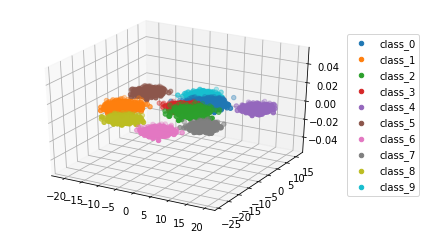

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    ax.scatter(x[idx[i],0],x[idx[i],1],x[idx[i],2],label="class_"+str(i))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [10]:
foreground_classes = {'class_0','class_1', 'class_2'}

background_classes = {'class_3','class_4', 'class_5', 'class_6','class_7', 'class_8', 'class_9'}

In [11]:
fg_class  = np.random.randint(0,3)
fg_idx = np.random.randint(0,9)

a = []
for i in range(9):
    if i == fg_idx:
        b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
        a.append(x[b])
        print("foreground "+str(fg_class)+" present at " + str(fg_idx))
    else:
        bg_class = np.random.randint(3,10)
        b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
        a.append(x[b])
        print("background "+str(bg_class)+" present at " + str(i))
a = np.concatenate(a,axis=0)
print(a.shape)

print(fg_class , fg_idx)

background 4 present at 0
background 6 present at 1
background 5 present at 2
background 6 present at 3
background 6 present at 4
background 5 present at 5
background 7 present at 6
foreground 1 present at 7
background 9 present at 8
(9, 3)
1 7


In [12]:
a.shape

(9, 3)

In [13]:
np.reshape(a,(27,1))

array([[ 14.70936312],
       [  9.25539947],
       [  0.        ],
       [  2.90652386],
       [-18.68192952],
       [  0.        ],
       [-15.86157932],
       [  3.15812308],
       [  0.        ],
       [  1.58696221],
       [-16.69797605],
       [  0.        ],
       [  4.2617939 ],
       [-17.2196327 ],
       [  0.        ],
       [-14.33154685],
       [  1.94084889],
       [  0.        ],
       [ 13.35578344],
       [ -6.14739712],
       [  0.        ],
       [-12.32815954],
       [-10.68544331],
       [  0.        ],
       [ -1.0149269 ],
       [ 12.8509836 ],
       [  0.        ]])

In [14]:
a=np.reshape(a,(3,9))

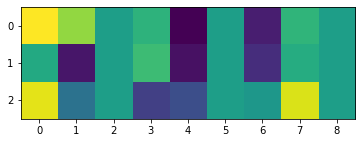

In [15]:
plt.imshow(a)

In [16]:
desired_num = 3000
mosaic_list =[]
mosaic_label = []
fore_idx=[]
for j in range(desired_num):
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,9)
    a = []
    for i in range(9):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list.append(np.reshape(a,(27,1)))
    mosaic_label.append(fg_class)
    fore_idx.append(fg_idx)

In [17]:
mosaic_list = np.concatenate(mosaic_list,axis=1).T
print(mosaic_list)

[[-14.89245723  -8.13316368   0.         ...   9.59718219  -9.38523634
    0.        ]
 [-12.97444226  -9.18305167   0.         ... -10.84363561 -14.86294397
    0.        ]
 [-10.1577118  -13.92982834   0.         ...   2.40185879   0.80566219
    0.        ]
 ...
 [  4.1052509    2.56320887   0.         ... -13.14257898 -14.00473838
    0.        ]
 [-11.89844023 -17.56875805   0.         ...  15.40951407   6.46059127
    0.        ]
 [  7.46347349  -6.32128684   0.         ...  -1.0043239  -17.41703336
    0.        ]]


In [18]:
print(np.shape(mosaic_label))
print(np.shape(fore_idx))

(3000,)
(3000,)


In [19]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

batch = 250
msd = MosaicDataset(mosaic_list, mosaic_label , fore_idx)
train_loader = DataLoader( msd,batch_size= batch ,shuffle=True)

In [20]:
class Wherenet(nn.Module):
    def __init__(self):
        super(Wherenet,self).__init__()
        self.linear1 = nn.Linear(3,4)
        self.linear2 = nn.Linear(4,8)
        self.linear3 = nn.Linear(8,1)
    def forward(self,z):
        x = torch.zeros([batch,9],dtype=torch.float64)
        y = torch.zeros([batch,3], dtype=torch.float64)
        #x,y = x.to("cuda"),y.to("cuda")
        for i in range(9):
            x[:,i] = self.helper(z[:,3*i:3*i+3])[:,0]
            #print(k[:,0].shape,x[:,i].shape)
        x = F.softmax(x,dim=1)   # alphas
        x1 = x[:,0]
        for i in range(9):
            x1 = x[:,i]          
            #print()
            y = y+torch.mul(x1[:,None],z[:,3*i:3*i+3])
        return y , x 

    
    def helper(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

    

In [21]:
trainiter = iter(train_loader)
input1,labels1,index1 = trainiter.next()



In [22]:
where = Wherenet().double()
where = where
out_where,alphas = where(input1)
out_where.shape,alphas.shape

(torch.Size([250, 3]), torch.Size([250, 9]))

In [23]:
class Whatnet(nn.Module):
    def __init__(self):
        super(Whatnet,self).__init__()
        self.linear1 = nn.Linear(3,4)
        self.linear2 = nn.Linear(4,3)
#         self.linear3 = nn.Linear(8,3)
    def forward(self,x):
        x = F.relu(self.linear1(x))
        #x = F.relu(self.linear2(x))
        x = self.linear2(x)
        return x

In [24]:
what = Whatnet().double()
what(out_where)

tensor([[-4.4967e-01, -7.5296e-02, -3.6312e-01],
        [-7.5385e-03, -1.8973e-01, -1.0108e+00],
        [ 6.4614e-02, -2.2408e-01, -1.3075e+00],
        [-1.1566e-03, -1.7030e-01, -1.3455e+00],
        [-6.7412e-02,  1.2977e-02, -8.0995e-01],
        [-4.2983e-01,  8.4974e-03, -6.1854e-01],
        [-2.0685e-02, -1.9630e-01, -7.6180e-01],
        [ 8.3407e-02, -2.5175e-01, -1.0979e+00],
        [-4.7817e-01, -2.8175e-01,  3.0088e-01],
        [ 1.1614e-01, -2.6496e-01, -1.2948e+00],
        [-2.2907e-01,  7.8161e-01, -1.0247e+00],
        [ 9.9930e-02, -2.6305e-01, -1.1485e+00],
        [ 1.8614e-01, -3.0969e-01, -1.4261e+00],
        [ 3.9020e-02, -2.3009e-01, -9.5243e-01],
        [ 8.1104e-02, -2.8253e-02, -1.3304e+00],
        [ 8.3295e-02, -2.5405e-01, -1.0950e+00],
        [ 1.1659e-02, -2.1529e-01, -8.6433e-01],
        [-1.8325e-01, -7.8362e-02, -6.6884e-01],
        [-2.9049e-01,  7.7719e-01, -7.8626e-01],
        [ 6.0648e-02, -2.1992e-01, -1.3223e+00],
        [-2.0426e-01

In [25]:
test_data_required = 1000
mosaic_list_test =[]
mosaic_label_test = []
fore_idx_test=[]
for j in range(test_data_required):
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,9)
    a = []
    for i in range(9):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list_test.append(np.reshape(a,(27,1)))
    mosaic_label_test.append(fg_class)
    fore_idx_test.append(fg_idx)

In [26]:
mosaic_list_test = np.concatenate(mosaic_list_test,axis=1).T
print(mosaic_list_test.shape)

(1000, 27)


In [27]:
test_data = MosaicDataset(mosaic_list_test,mosaic_label_test,fore_idx_test)
test_loader = DataLoader( test_data,batch_size= batch ,shuffle=False)

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer_where = optim.SGD(where.parameters(), lr=0.01, momentum=0.9)
optimizer_what = optim.SGD(what.parameters(), lr=0.01, momentum=0.9)

nos_epochs = 10000

train_loss=[]
test_loss =[]
train_acc = []
test_acc = []
loss_curi = []
for epoch in range(nos_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    ep_lossi = []
    cnt=0
    iteration = desired_num // batch

    #training data set

    for i, data in  enumerate(train_loader):
        inputs , labels , fore_idx = data
        #inputs,labels,fore_idx = inputs.to(device),labels.to(device),fore_idx.to(device)
        # zero the parameter gradients

        optimizer_what.zero_grad()
        optimizer_where.zero_grad()
        
        avg_inp,alphas = where(inputs)
        outputs = what(avg_inp)
        _, predicted = torch.max(outputs.data, 1)
        
        loss = criterion(outputs, labels) 
        loss.backward() 
        
        optimizer_what.step()
        optimizer_where.step() 
        

        running_loss += loss.item()
        if i % 2 == 1:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss/2 ))
            ep_lossi.append(running_loss/2) # loss per minibatch
            running_loss = 0.0
    if(np.mean(ep_lossi) <= 0.1):
        break       
    loss_curi.append(np.mean(ep_lossi))
    
print('Finished Training')


[1,     2] loss: 1.200
[1,     4] loss: 1.171
[1,     6] loss: 1.152
[1,     8] loss: 1.132
[1,    10] loss: 1.123
[1,    12] loss: 1.110
[2,     2] loss: 1.097
[2,     4] loss: 1.108
[2,     6] loss: 1.098
[2,     8] loss: 1.100
[2,    10] loss: 1.097
[2,    12] loss: 1.101
[3,     2] loss: 1.072
[3,     4] loss: 1.099
[3,     6] loss: 1.076
[3,     8] loss: 1.084
[3,    10] loss: 1.084
[3,    12] loss: 1.080
[4,     2] loss: 1.072
[4,     4] loss: 1.064
[4,     6] loss: 1.043
[4,     8] loss: 1.050
[4,    10] loss: 1.076
[4,    12] loss: 1.050
[5,     2] loss: 1.025
[5,     4] loss: 1.048
[5,     6] loss: 1.023
[5,     8] loss: 1.013
[5,    10] loss: 0.994
[5,    12] loss: 0.983
[6,     2] loss: 0.955
[6,     4] loss: 0.989
[6,     6] loss: 0.934
[6,     8] loss: 0.920
[6,    10] loss: 0.889
[6,    12] loss: 0.861
[7,     2] loss: 0.856
[7,     4] loss: 0.865
[7,     6] loss: 0.805
[7,     8] loss: 0.781
[7,    10] loss: 0.798
[7,    12] loss: 0.731
[8,     2] loss: 0.755
[8,     4] 

In [29]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in train_loader:
        inputs, labels,_ = data
#         inputs, labels = inputs.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        avg_inp,alphas = where(inputs)
        outputs = what(avg_inp)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d train images: %d %%' % (total, 100 * correct / total))

Accuracy of the network on the 3000 train images: 94 %


In [30]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in test_loader:
        inputs, labels,_ = data
#         inputs, labels = inputs.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        avg_inp,alphas = where(inputs)
        outputs = what(avg_inp)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d train images: %d %%' % (total, 100 * correct / total))

Accuracy of the network on the 1000 train images: 92 %
